# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [ ]:
# Passo 3: Extração/Obtenção de Dados
import pandas as pd

tabela = pd.read_csv('advertising.csv')
display(tabela)

# Passo 4: Ajuste de Dados (Tratamento/Limpeza)
print(tabela.info())

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [ ]:
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


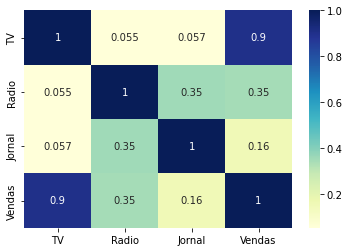

In [9]:
# Passo 5: Análise Exploratória

# a correlação varia de 0 para 1, quanto mais próximo de 1, mas as duas variavés "caminham juntas", 
# mais estão relacionadas
# "corr" de correlation
display(tabela.corr())

import seaborn as sns #cria o gráfico
import matplotlib.pyplot as plt #exibe o grafico

# criar gráfico 
sns.heatmap(tabela.corr(), cmap='YlGnBu', annot=True)
# exibir gráfico
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [10]:
# Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)

# é preciso separar a tabela em campos de x e dados de y para analisar mais a fundo e
# realizar as previsões
# y -> é quem você quer prever (vendas, nesse caso)
y = tabela['Vendas']
# x -> que eu vou usar para prever y, ou seja, o resto da tabela
x = tabela[['TV', 'Radio', 'Jornal']]

# agora é preciso separar a tabela em 2 partes
# uma para treino: para a IA aprender com aqueles dados
# uma para teste: para a IA aplicar o que aprendeu com os dados anteriores
# e avaliarmos se está funcionando corretamente

from sklearn.model_selection import train_test_split

# a estrutura padrão do train_test_split é exatamente essa abaixo 'x_train, x_test, y_train, y_test'
# o nome da variavel não importa, mas a ordem é sempre as informações de x, depois as de y
# sendo primeiro as de treino e depois as de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) #test_size é opcional

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [13]:
# PASSOS PARA CRIAR UMA INTELIGçENCIA ARTIFICIAL
# 1. importa ela
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 2. cria ela
# modelo 1 de IA
modelo_regressaolinear = LinearRegression()
# modelo 2 de IA
modelo_arvoredecisao = RandomForestRegressor()

# 3. treina ela
#fit de treinar/ treino
modelo_regressaolinear.fit(x_train, y_train)
modelo_arvoredecisao.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [14]:
# Passo 7: Interpretação de Resultados
from sklearn.metrics import r2_score

# fazer as previsões
previsao_regressaolinear = modelo_regressaolinear.predict(x_test)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_test)

# comparar as previsões com y_test
print(r2_score(y_test, previsao_regressaolinear))
print(r2_score(y_test, previsao_arvoredecisao))

0.9351981341979915
0.9444879300734947


#### Visualização Gráfica das Previsões

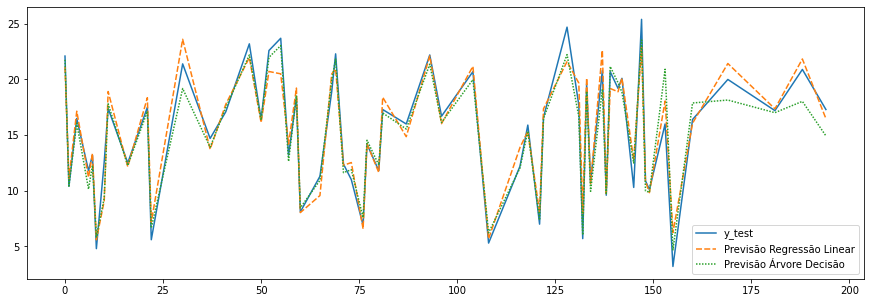

In [17]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_test'] = y_test
tabela_auxiliar['Previsão Regressão Linear'] = previsao_regressaolinear
tabela_auxiliar['Previsão Árvore Decisão'] = previsao_arvoredecisao

plt.figure(figsize = (15, 5)) #para mudar o tamanho do gráfico, ordem dos valores (largura, altura)
sns.lineplot(data = tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [19]:
tabela_nova = pd.read_csv('novos.csv')
display(tabela_nova)

previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.758  9.286 20.661]
